<a href="https://colab.research.google.com/github/emh0841-code/Final-Team9/blob/main/%EC%8B%9C%EB%8C%80%EC%97%90_%EB%94%B0%EB%9D%BC_%ED%9D%A5%ED%96%89%ED%95%98%EB%8A%94_%EC%9E%A5%EB%A5%B4%EA%B0%80_%EB%8B%A4%EB%A5%BC%EA%B2%83%EC%9D%B4%EB%8B%A4_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
#한글 글씨 폰트 설치
%%capture
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
fm.fontManager.addfont('/usr/share/fonts/truetype/nanum/NanumGothic.ttf')
plt.rcParams['font.family'] = 'NanumGothic'

# 표에서 ('-') 마이너스 표시
plt.rcParams['axes.unicode_minus'] = False

# 필요한 라이브러리 임포트
import pandas as pd # 데이터 분석 라이브러리
import numpy as np
import matplotlib.pyplot as plt # 시각화 도구 라이브러리1
import seaborn as sns # 시각화 도구 라이브러리2

In [75]:
df = pd.read_csv("/content/movies_genres_ohe.csv", on_bad_lines='skip')

[1980년대 이후] 항목별 카운트(편수):
 Drama              6389.0
Comedy             5094.0
Thriller           3585.0
Action             3446.0
Romance            2517.0
Adventure          2292.0
Crime              2165.0
Horror             1663.0
Family             1439.0
Science Fiction    1376.0
Fantasy            1350.0
Mystery            1162.0
Animation           766.0
History             753.0
War                 466.0
Music               431.0
Documentary         158.0
Western             156.0
TV Movie             14.0
dtype: float64 

시대 × 항목별 평균 y_result (1980년대 이후):
          Action  Adventure  Animation    Comedy     Crime  Documentary  \
decade                                                                    
1980.0  1.134921   1.189474   1.043478  1.289216  1.080851     0.500000   
1990.0  1.081218   1.257618   1.116883  1.033916  1.004292     1.000000   
2000.0  1.007209   1.161094   1.309524  1.081633  0.966472     1.350000   
2010.0  1.200163   1.321429   1.409742  1.267966  0.92

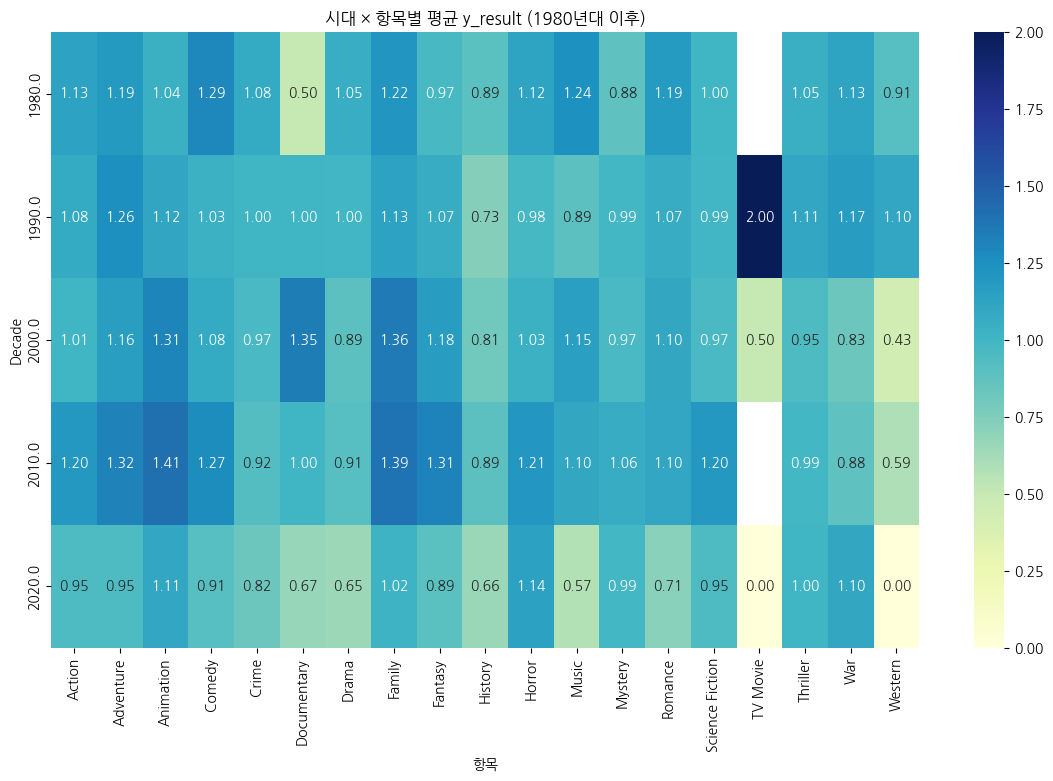

1980년대 이후 상위 5개 항목: ['Family', 'Animation', 'Adventure', 'Comedy', 'Horror'] 



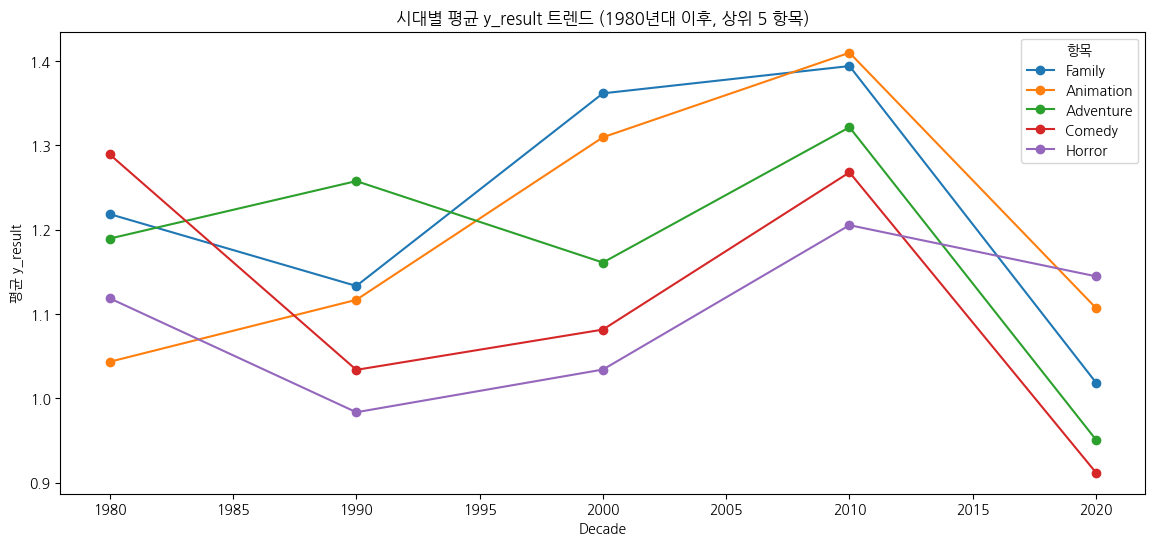

시대별 최고 흥행 항목 Top3 (y_result 기준, 1980년대 이후):
             Top1  Top1_val         Top2  Top2_val       Top3  Top3_val
decade                                                                 
1980.0     Comedy  1.289216        Music  1.244898     Family  1.218487
1990.0   TV Movie  2.000000    Adventure  1.257618        War  1.170732
2000.0     Family  1.361607  Documentary  1.350000  Animation  1.309524
2010.0  Animation  1.409742       Family  1.393939  Adventure  1.321429
2020.0     Horror  1.144737    Animation  1.107143        War  1.100000 

[정규성 검정: Shapiro-Wilk] (1980년대 이후, Top5 항목)
Family          → W=0.8584, p=4.1465e-34, n=1439
Animation       → W=0.8378, p=3.2800e-27, n=766
Adventure       → W=0.8422, p=5.7229e-43, n=2292
Comedy          → W=0.8516, p=1.9270e-56, n=5094
Horror          → W=0.8459, p=1.9072e-37, n=1663

[ANOVA 결과] (1980년대 이후, Top5)
F = 10.4377, p = 1.9459e-08

[Kruskal-Wallis 결과] (1980년대 이후, Top5)
H = 32.8833, p = 1.2620e-06



/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5094.
  res = hypotest_fun_out(*samples, **kwds)


In [76]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro, f_oneway, kruskal


df.columns = df.columns.str.strip()

# 날짜 → year → decade
df["release_date"] = pd.to_datetime(df["release_date"], errors="coerce")
df["year"] = df["release_date"].dt.year
df["decade"] = (df["year"] // 10) * 10

#  1980년대 이후만 사용
df = df[df["decade"] >= 1980].copy()

# 장르(항목) 0/1 컬럼 자동 선택 (Action ~ Western 구간)
cols = df.loc[:, "Action":"Western"].columns.tolist()


# 1) 간단 체크: 항목별 전체 카운트
col_counts = df[cols].sum().sort_values(ascending=False)
print("[1980년대 이후] 항목별 카운트(편수):\n", col_counts, "\n")


# 시대 × 항목별 평균 y_result

decade_genre = {}
for c in cols:
    decade_genre[c] = df.loc[df[c] == 1].groupby("decade")["y_result"].mean()

decade_genre = pd.DataFrame(decade_genre).sort_index()
print("시대 × 항목별 평균 y_result (1980년대 이후):")
print(decade_genre, "\n")

plt.figure(figsize=(14,8))
sns.heatmap(decade_genre, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("시대 × 항목별 평균 y_result (1980년대 이후)")
plt.xlabel("항목")
plt.ylabel("Decade")
plt.show()

# 3) 전체 기간(1980+) 평균 기준 상위 5개 항목 추출
topN = 5
top_cols = decade_genre.mean().sort_values(ascending=False).head(topN).index.tolist()
print(f"1980년대 이후 상위 {topN}개 항목:", top_cols, "\n")

# 라인 그래프 (Top5 트렌드)
decade_genre[top_cols].plot(marker="o", figsize=(14,6))
plt.title(f"시대별 평균 y_result 트렌드 (1980년대 이후, 상위 {topN} 항목)")
plt.xlabel("Decade")
plt.ylabel("평균 y_result")
plt.legend(title="항목")
plt.show()


#  시대별 Top3

def top3(row):
    s = row.dropna().sort_values(ascending=False).head(3)
    out = {}
    for i in range(3):
        if i < len(s):
            out[f"Top{i+1}"] = s.index[i]
            out[f"Top{i+1}_val"] = float(s.iloc[i])
        else:
            out[f"Top{i+1}"] = None
            out[f"Top{i+1}_val"] = None
    return pd.Series(out)

top3_table = decade_genre.apply(top3, axis=1)
print("시대별 최고 흥행 항목 Top3 (y_result 기준, 1980년대 이후):")
print(top3_table, "\n")

#  상위 5개 항목: 정규성 → ANOVA → Kruskal

print("[정규성 검정: Shapiro-Wilk] (1980년대 이후, Top5 항목)")
for c in top_cols:
    vals = df.loc[df[c] == 1, "y_result"].dropna()
    if len(vals) >= 8:
        stat, p = shapiro(vals)
        print(f"{c:15s} → W={stat:.4f}, p={p:.4e}, n={len(vals)}")
    else:
        print(f"{c:15s} → 샘플 부족 (n={len(vals)})")
print()

# ANOVA
groups = [df.loc[df[c] == 1, "y_result"].dropna() for c in top_cols]
if all(len(g) >= 2 for g in groups):
    f_stat, p_val = f_oneway(*groups)
    print(f"[ANOVA 결과] (1980년대 이후, Top5)\nF = {f_stat:.4f}, p = {p_val:.4e}\n")
else:
    print("[ANOVA] 표본 부족으로 건너뜀\n")

# Kruskal-Wallis
if all(len(g) >= 2 for g in groups):
    h_stat, p_val = kruskal(*groups)
    print(f"[Kruskal-Wallis 결과] (1980년대 이후, Top5)\nH = {h_stat:.4f}, p = {p_val:.4e}\n")
else:
    print("[Kruskal-Wallis] 표본 부족으로 건너뜀\n")



2020년대 Top5 장르: ['Horror', 'Animation', 'War', 'Family', 'Thriller']

2020년대 Top5 장르의 시대별 평균 y_result 흐름:
          Horror  Animation       War    Family  Thriller
decade                                                   
1980.0  1.118705   1.043478  1.132353  1.218487  1.050445
1990.0  0.983673   1.116883  1.170732  1.133333  1.109177
2000.0  1.034261   1.309524  0.827815  1.361607  0.951111
2010.0  1.205374   1.409742  0.881720  1.393939  0.989633
2020.0  1.144737   1.107143  1.100000  1.018692  1.000000


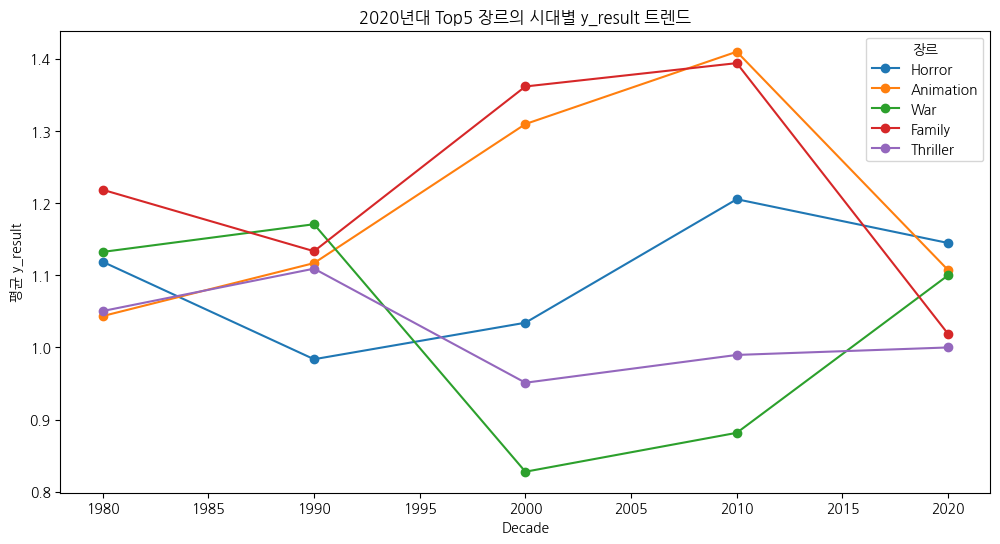

In [77]:
#  2020년대만 필터
df_2020 = df[df["decade"] == 2020].copy()
cols = df.loc[:, "Action":"Western"].columns.tolist()

#  2020년대 장르별 평균 y_result 계산
genre_mean_2020 = {c: df_2020.loc[df_2020[c]==1, "y_result"].mean() for c in cols}
genre_mean_2020 = pd.Series(genre_mean_2020).dropna().sort_values(ascending=False)

#  Top5 장르 추출
topN = 5
top_cols_2020 = genre_mean_2020.head(topN).index.tolist()
print("2020년대 Top5 장르:", top_cols_2020)

# 전체 데이터(1980년대 이후)에서 이 장르들의 시대별 평균 흐름 계산
decade_trend = {}
for c in top_cols_2020:
    decade_trend[c] = df.loc[df[c]==1].groupby("decade")["y_result"].mean()

decade_trend = pd.DataFrame(decade_trend).sort_index()

print("\n2020년대 Top5 장르의 시대별 평균 y_result 흐름:")
print(decade_trend)

#  시각화
import matplotlib.pyplot as plt

decade_trend.plot(marker="o", figsize=(12,6))
plt.title("2020년대 Top5 장르의 시대별 y_result 트렌드")
plt.xlabel("Decade")
plt.ylabel("평균 y_result")
plt.legend(title="장르")
plt.show()


📌 2020년대 장르별 평균 y_result 순위:
Horror             1.144737
Animation          1.107143
War                1.100000
Family             1.018692
Thriller           1.000000
Mystery            0.989247
Action             0.953069
Adventure          0.950980
Science Fiction    0.945946
Comedy             0.912000
Fantasy            0.892086
Crime              0.822430
Romance            0.714286
Documentary        0.666667
History            0.657895
Drama              0.653968
Music              0.571429
TV Movie           0.000000
Western            0.000000
dtype: float64


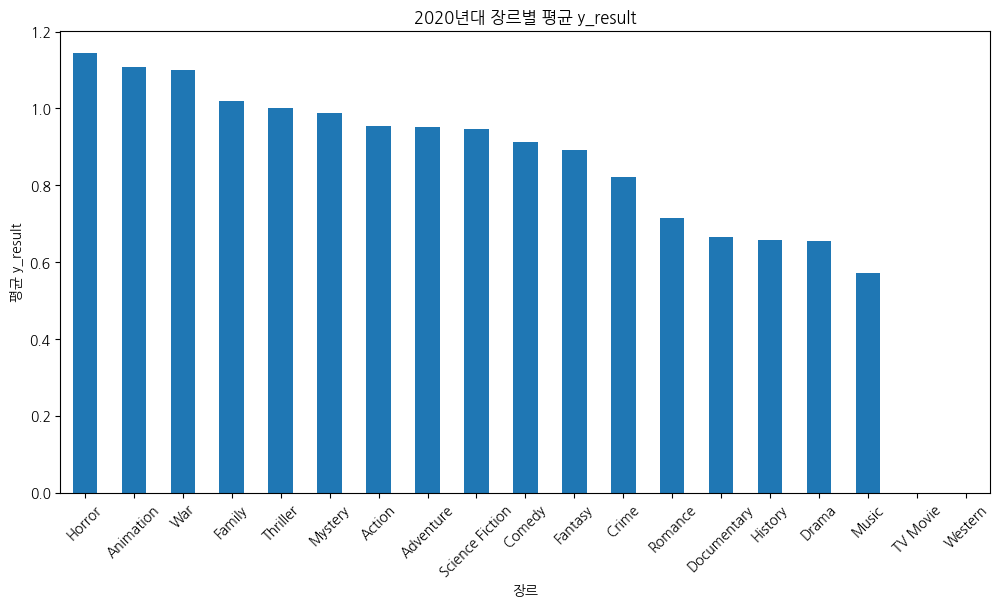

In [78]:
# 2020년대 데이터 필터
df_2020 = df[df["decade"] == 2020].copy()

# 장르 컬럼 자동 추출
cols = df.loc[:, "Action":"Western"].columns.tolist()

# 2020년대 장르별 평균 y_result
genre_mean_2020 = {
    c: df_2020.loc[df_2020[c] == 1, "y_result"].mean()
    for c in cols
}
genre_mean_2020 = pd.Series(genre_mean_2020).dropna().sort_values(ascending=False)

# 출력
print("📌 2020년대 장르별 평균 y_result 순위:")
print(genre_mean_2020)

# 시각화
import matplotlib.pyplot as plt
genre_mean_2020.plot(kind="bar", figsize=(12,6))
plt.title("2020년대 장르별 평균 y_result")
plt.xlabel("장르")
plt.ylabel("평균 y_result")
plt.xticks(rotation=45)
plt.show()



전체 장르의 시대별 평균 y_result 흐름:
          Action  Adventure  Animation    Comedy     Crime  Documentary  \
decade                                                                    
1980.0  1.134921   1.189474   1.043478  1.289216  1.080851     0.500000   
1990.0  1.081218   1.257618   1.116883  1.033916  1.004292     1.000000   
2000.0  1.007209   1.161094   1.309524  1.081633  0.966472     1.350000   
2010.0  1.200163   1.321429   1.409742  1.267966  0.922504     1.000000   
2020.0  0.953069   0.950980   1.107143  0.912000  0.822430     0.666667   

           Drama    Family   Fantasy   History    Horror     Music   Mystery  \
decade                                                                         
1980.0  1.054867  1.218487  0.975000  0.892308  1.118705  1.244898  0.875000   
1990.0  0.995532  1.133333  1.069869  0.728261  0.983673  0.888889  0.985714   
2000.0  0.888249  1.361607  1.175393  0.805000  1.034261  1.149660  0.967822   
2010.0  0.908460  1.393939  1.313636  0.887500

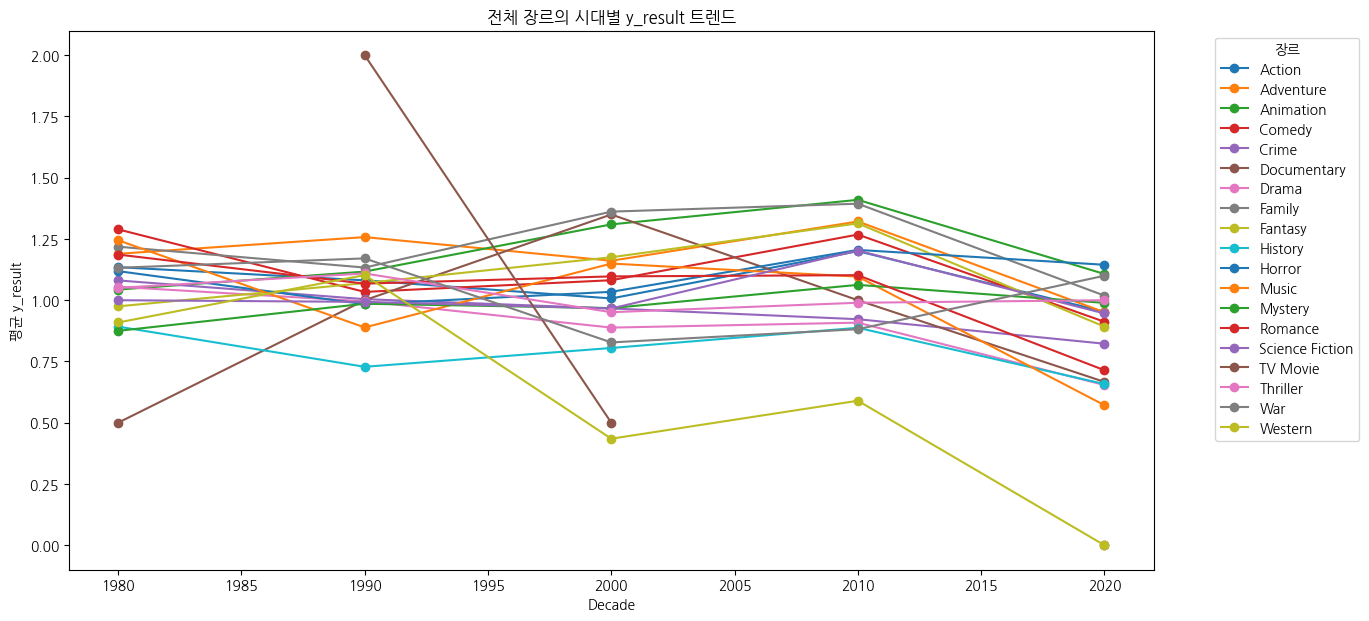

In [79]:
# 전체 장르별 시대별 평균 y_result 계산
decade_trend_all = {}
for c in cols:
    decade_trend_all[c] = df.loc[df[c] == 1].groupby("decade")["y_result"].mean()

decade_trend_all = pd.DataFrame(decade_trend_all).sort_index()

print("\n전체 장르의 시대별 평균 y_result 흐름:")
print(decade_trend_all)

# 시각화
plt.figure(figsize=(14,7))
for c in decade_trend_all.columns:
    plt.plot(decade_trend_all.index, decade_trend_all[c], marker="o", label=c)

plt.title("전체 장르의 시대별 y_result 트렌드")
plt.xlabel("Decade")
plt.ylabel("평균 y_result")
plt.legend(title="장르", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()



전체 장르의 5년 단위 평균 y_result 흐름:
            Action  Adventure  Animation    Comedy     Crime  Documentary  \
year_bin                                                                    
1980      1.369128   1.403509   1.142857  1.385366  1.109756     0.666667   
1985      0.982533   1.046784   1.000000  1.240786  1.065359     0.000000   
1990      1.097378   1.205128   0.678571  1.022727  0.967742     2.000000   
1995      1.067901   1.297561   1.367347  1.041594  1.036145     0.500000   
2000      1.000000   1.239852   1.232558  1.116246  0.954693     1.466667   
2005      1.013645   1.105943   1.362903  1.054264  0.976127     1.280000   
2010      1.139837   1.269122   1.323529  1.244318  0.924581     1.105263   
2015      1.260586   1.364269   1.491620  1.295276  0.920128     0.714286   
2020      0.953069   0.950980   1.107143  0.912000  0.822430     0.666667   

             Drama    Family   Fantasy   History    Horror     Music  \
year_bin                                          

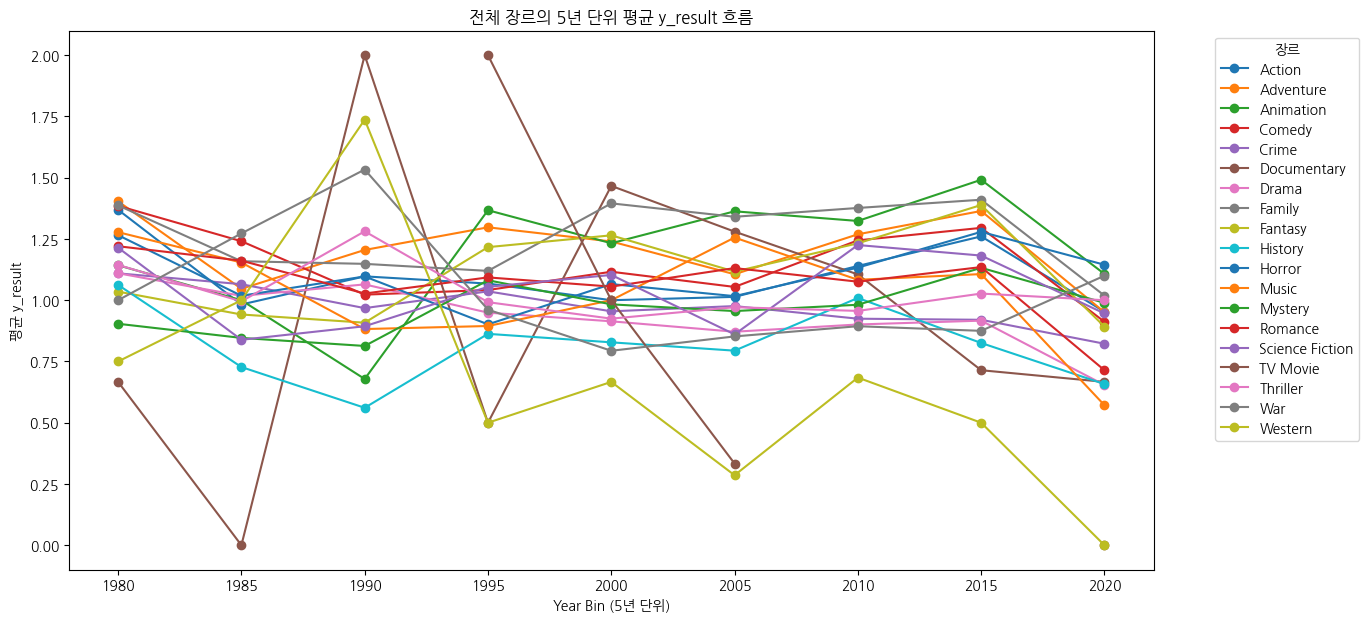

In [80]:
# 1) 연도 추출
df["release_year"] = pd.to_datetime(df["release_date"], errors="coerce").dt.year

# 2) 5년 주기 그룹 생성
df["year_bin"] = (df["release_year"] // 5) * 5
# 3) 전체 장르별 5년 주기 평균 y_result 계산
trend_5y = {}
for c in cols:
    trend_5y[c] = df.loc[df[c] == 1].groupby("year_bin")["y_result"].mean()

trend_5y = pd.DataFrame(trend_5y).sort_index()

print("\n전체 장르의 5년 단위 평균 y_result 흐름:")
print(trend_5y)

# 4) 시각화
plt.figure(figsize=(14,7))
for c in trend_5y.columns:
    plt.plot(trend_5y.index, trend_5y[c], marker="o", label=c)

plt.title("전체 장르의 5년 단위 평균 y_result 흐름")  # ← 타이틀 수정
plt.xlabel("Year Bin (5년 단위)")
plt.ylabel("평균 y_result")
plt.legend(title="장르", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()


2020~2025년 Top5 장르: ['Horror', 'Animation', 'War', 'Family', 'Thriller']

상위 5개 장르의 5년 단위 평균 y_result 흐름 (2025년까지):
            Horror  Animation       War    Family  Thriller
year_bin                                                   
1980      1.265487   1.142857  1.000000  1.387097  1.144000
1985      1.018182   1.000000  1.272727  1.159091  0.995283
1990      1.097087   0.678571  1.533333  1.148438  1.281250
1995      0.901408   1.367347  0.961538  1.119718  0.992021
2000      1.065868   1.232558  0.793651  1.395349  0.924797
2005      1.016667   1.362903  0.852273  1.340580  0.971564
2010      1.133080   1.323529  0.893939  1.376569  0.956391
2015      1.279070   1.491620  0.875000  1.410156  1.027165
2020      1.144737   1.107143  1.100000  1.018692  1.000000


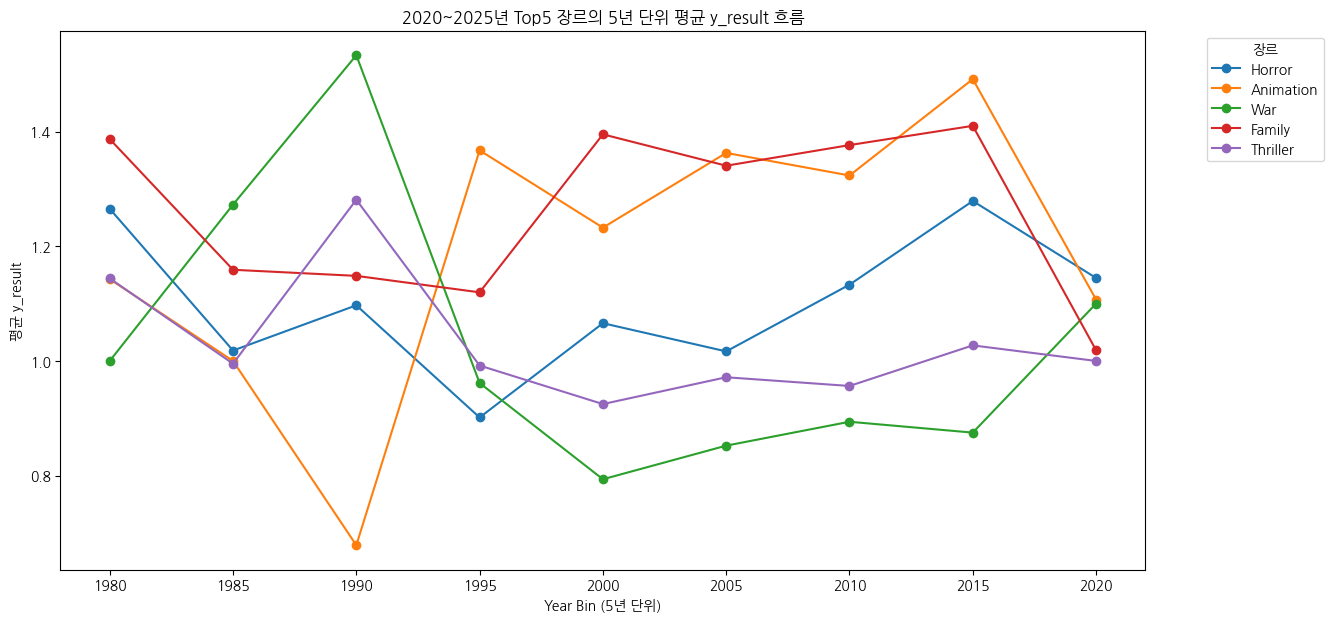

In [81]:
# 1) 연도 추출
df["release_year"] = pd.to_datetime(df["release_date"], errors="coerce").dt.year

# 2) 5년 단위 그룹 (마지막 구간은 2025로 표시)
df["year_bin"] = (df["release_year"] // 5) * 5
df.loc[df["release_year"] >= 2025, "year_bin"] = 2025   # 2025년 포함

# 3) 2020년대 데이터만 필터
df_2020 = df[df["year_bin"] >= 2020].copy()

# 4) 2020년대 장르별 평균 y_result 계산
genre_mean_2020 = {c: df_2020.loc[df_2020[c]==1, "y_result"].mean() for c in cols}
genre_mean_2020 = pd.Series(genre_mean_2020).dropna().sort_values(ascending=False)

# 5) Top5 장르 추출
topN = 5
top_cols_2020 = genre_mean_2020.head(topN).index.tolist()
print("2020~2025년 Top5 장르:", top_cols_2020)

# 6) 상위 5개 장르의 5년 단위 평균 y_result 흐름
trend_top5 = {}
for c in top_cols_2020:
    trend_top5[c] = df.loc[df[c] == 1].groupby("year_bin")["y_result"].mean()

trend_top5 = pd.DataFrame(trend_top5).sort_index()

print("\n상위 5개 장르의 5년 단위 평균 y_result 흐름 (2025년까지):")
print(trend_top5)

# 7) 시각화
plt.figure(figsize=(14,7))
for c in trend_top5.columns:
    plt.plot(trend_top5.index, trend_top5[c], marker="o", label=c)

plt.title("2020~2025년 Top5 장르의 5년 단위 평균 y_result 흐름")
plt.xlabel("Year Bin (5년 단위)")
plt.ylabel("평균 y_result")
plt.legend(title="장르", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()


2020 기준 Top5 장르: ['Horror', 'Animation', 'War', 'Family', 'Thriller']


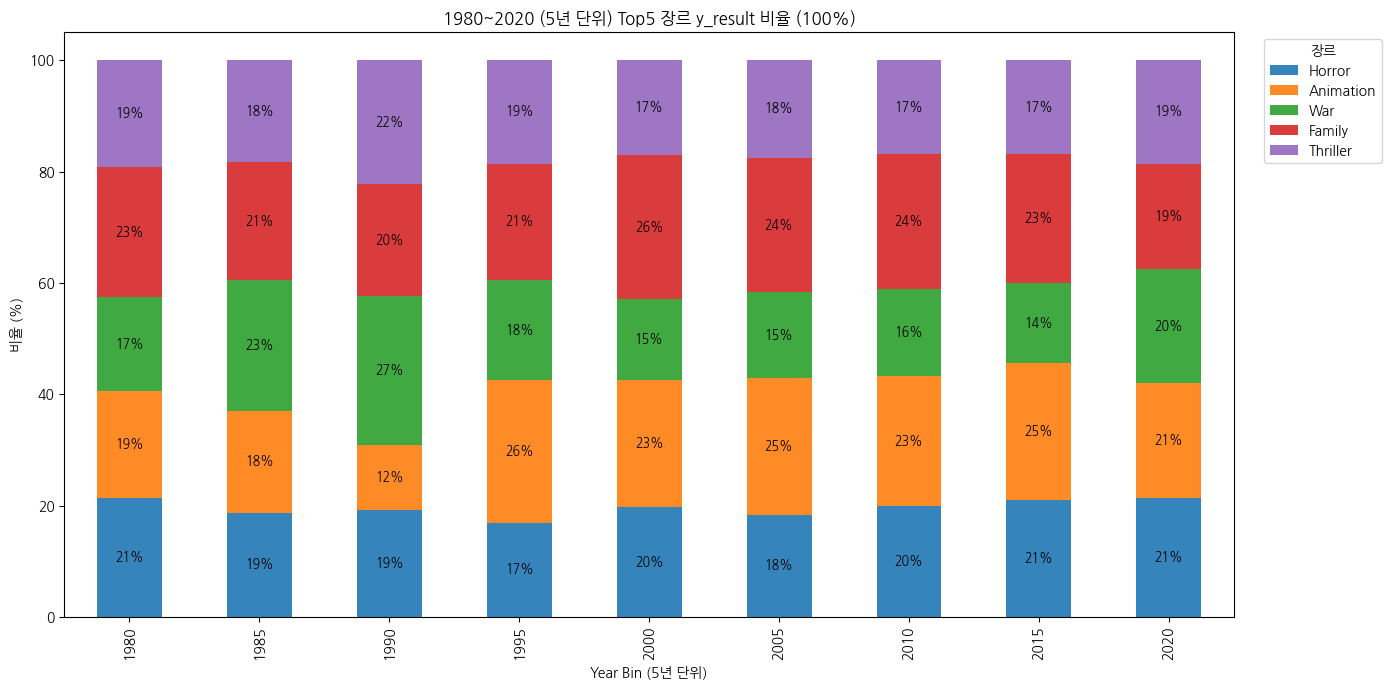

In [88]:
df["release_year"] = pd.to_datetime(df["release_date"], errors="coerce").dt.year
df["year_bin"] = (df["release_year"] // 5) * 5
df = df[df["year_bin"] >= 1980].copy()
df.loc[df["release_year"] >= 2025, "year_bin"] = 2025  # 최신 구간 포함

latest_bin = df["year_bin"].max()
df_latest = df[df["year_bin"] == latest_bin]
genre_mean_latest = {c: df_latest.loc[df_latest[c]==1, "y_result"].mean() for c in cols}
top5 = pd.Series(genre_mean_latest).dropna().sort_values(ascending=False).head(5).index.tolist()
print(f"{latest_bin} 기준 Top5 장르:", top5)


trend_top5 = {c: df.loc[df[c]==1].groupby("year_bin")["y_result"].mean() for c in top5}
trend_top5 = pd.DataFrame(trend_top5).sort_index()
trend_top5_pct = trend_top5.div(trend_top5.sum(axis=1).replace(0, np.nan), axis=0) * 100


ax = trend_top5_pct.plot(kind="bar", stacked=True, figsize=(14,7), alpha=0.9)
ax.set_title(f"1980~{latest_bin} (5년 단위) Top5 장르 y_result 비율 (100%)")
ax.set_xlabel("Year Bin (5년 단위)")
ax.set_ylabel("비율 (%)")
ax.legend(title="장르", bbox_to_anchor=(1.02, 1), loc="upper left")

for container in ax.containers:
    labels = [f"{h.get_height():.0f}%" if h.get_height() >= 8 else "" for h in container]
    ax.bar_label(container, labels=labels, label_type='center', fontsize=9)

plt.tight_layout()
plt.show()



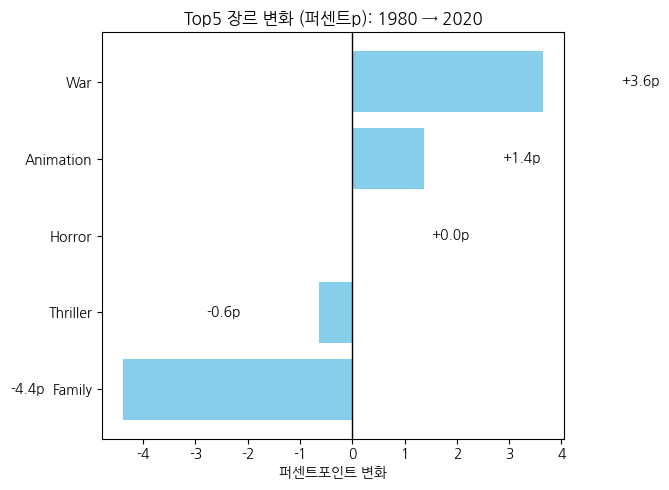

In [89]:

first_bin = trend_top5_pct.index.min()
latest_bin = trend_top5_pct.index.max()

# 변화량 계산
change_pp = (trend_top5_pct.loc[latest_bin] - trend_top5_pct.loc[first_bin]).sort_values()

# 수평 막대그래프
plt.figure(figsize=(7,5))
plt.barh(change_pp.index, change_pp.values, color="skyblue")
plt.axvline(0, color="black", linewidth=1)
plt.title(f"Top5 장르 변화 (퍼센트p): {first_bin} → {latest_bin}")
plt.xlabel("퍼센트포인트 변화")

# 막대 옆에 변화량 표시
for i, v in enumerate(change_pp.values):
    plt.text(v + (1.5 if v>=0 else -1.5), i, f"{v:+.1f}p",
             va='center', ha='left' if v>=0 else 'right', fontsize=10)

plt.tight_layout()
plt.show()


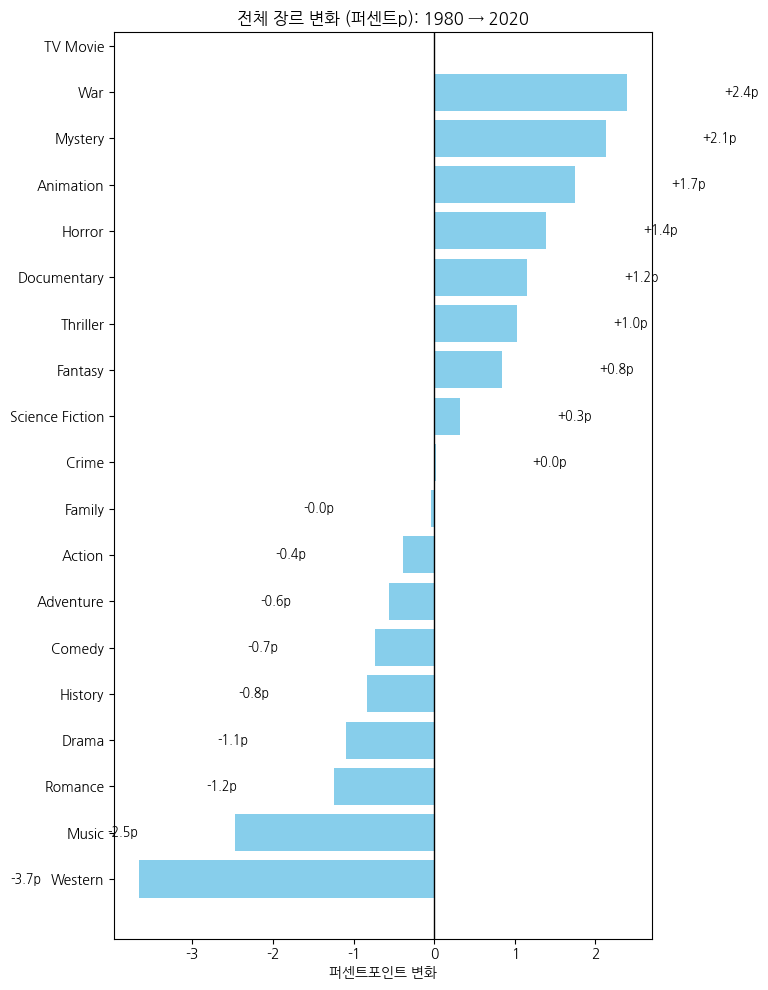

In [83]:

# 0) 준비: 연도/5년 단위 그룹화
df["release_year"] = pd.to_datetime(df["release_date"], errors="coerce").dt.year
df["year_bin"] = (df["release_year"] // 5) * 5

# 1980년 이후만 사용
df = df[df["year_bin"] >= 1980].copy()

# 2025년 이상은 전부 2025 구간으로 묶기
df.loc[df["release_year"] >= 2025, "year_bin"] = 2025

# 1) 전체 장르별 5년 단위 평균 y_result 계산
trend_all = {}
for c in cols:   # cols = ['Action','Adventure',...,'Western']
    trend_all[c] = df.loc[df[c] == 1].groupby("year_bin")["y_result"].mean()

trend_all = pd.DataFrame(trend_all).sort_index()

# 2) 100% 정규화 (각 구간별 합 = 100%)
trend_all_pct = trend_all.div(trend_all.sum(axis=1), axis=0) * 100

# 3) 초기(1980) ↔ 최신(2025) 변화(퍼센트p) 계산
first_bin = trend_all_pct.index.min()   # 1980
latest_bin = trend_all_pct.index.max()  # 2025
change_pp = (trend_all_pct.loc[latest_bin] - trend_all_pct.loc[first_bin]).sort_values()

# 4) 시각화 (수평 막대그래프)
plt.figure(figsize=(8,10))
plt.barh(change_pp.index, change_pp.values, color="skyblue")
plt.axvline(0, color="black", linewidth=1)
plt.title(f"전체 장르 변화 (퍼센트p): {first_bin} → {latest_bin}")
plt.xlabel("퍼센트포인트 변화")

# 막대 옆에 변화량 라벨 표시
for i, v in enumerate(change_pp.values):
    plt.text(v + (1.2 if v>=0 else -1.2), i, f"{v:+.1f}p",
             va='center', ha='left' if v>=0 else 'right', fontsize=9)

plt.tight_layout()
plt.show()


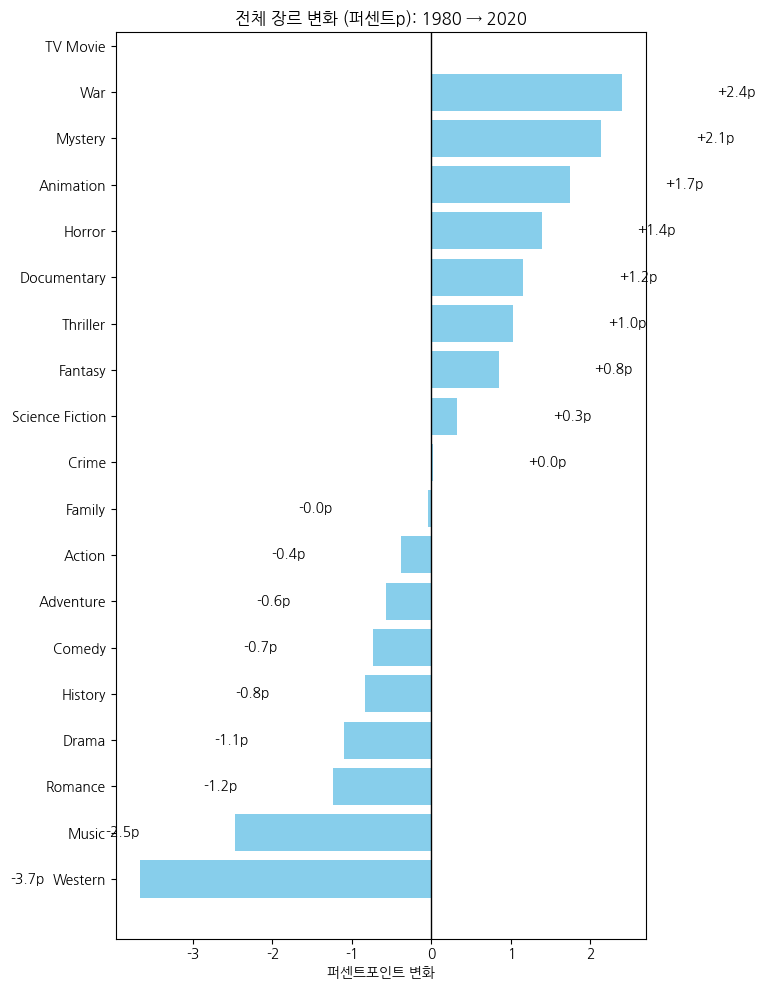

In [84]:
# 1) 전체 장르별 5년 단위 평균 y_result 계산
trend_all = {}
for c in cols:   # cols = ['Action','Adventure',...,'Western'] 장르 OHE 칼럼 리스트
    trend_all[c] = df.loc[df[c]==1].groupby("year_bin")["y_result"].mean()

trend_all = pd.DataFrame(trend_all).sort_index()

# 2) 100% 비율로 정규화
trend_all_pct = trend_all.div(trend_all.sum(axis=1), axis=0) * 100

# 3) 초기↔최신 변화(퍼센트p) 계산
first_bin = trend_all_pct.index.min()
latest_bin = trend_all_pct.index.max()
change_pp_all = (trend_all_pct.loc[latest_bin] - trend_all_pct.loc[first_bin]).sort_values()

# 4) 시각화 (전체 장르 변화)
plt.figure(figsize=(8,10))
plt.barh(change_pp_all.index, change_pp_all.values, color="skyblue")
plt.axvline(0, color="black", linewidth=1)
plt.title(f"전체 장르 변화 (퍼센트p): {first_bin} → {latest_bin}")
plt.xlabel("퍼센트포인트 변화")

# 막대 옆에 값 라벨 표시
for i, v in enumerate(change_pp_all.values):
    plt.text(v + (1.2 if v>=0 else -1.2), i, f"{v:+.1f}p",
             va='center', ha='left' if v>=0 else 'right')

plt.tight_layout()
plt.show()


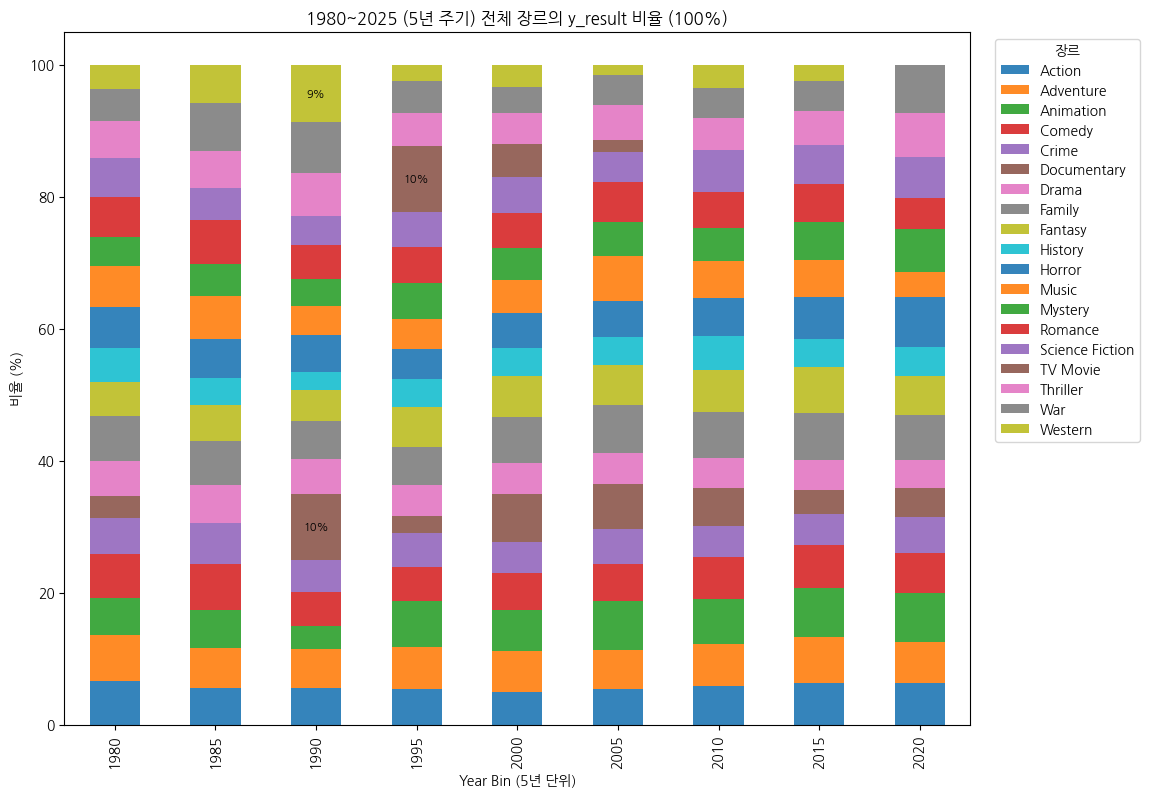

In [85]:
# 0) 준비: 연도/5년 주기
df["release_year"] = pd.to_datetime(df["release_date"], errors="coerce").dt.year
df["year_bin"] = (df["release_year"] // 5) * 5
df = df[df["year_bin"] >= 1980].copy()
df.loc[df["release_year"] >= 2025, "year_bin"] = 2025  # 2025 포함

# 1) 전체 장르별 5년 주기 평균 y_result 계산
trend_all = {}
for c in cols:   # cols = ['Action','Adventure',...,'Western'] 장르 리스트
    trend_all[c] = df.loc[df[c]==1].groupby("year_bin")["y_result"].mean()

trend_all = pd.DataFrame(trend_all).sort_index()

# 2) 100% 정규화
trend_all_pct = trend_all.div(trend_all.sum(axis=1), axis=0) * 100

# 3) 초기↔최신 변화(퍼센트p) 계산
first_bin = trend_all_pct.index.min()
latest_bin = trend_all_pct.index.max()
change_pp_all = (trend_all_pct.loc[latest_bin] - trend_all_pct.loc[first_bin]).sort_values()

# 4) 시각화: 왼쪽 = 100% 누적 막대(전체 장르), 오른쪽 = 변화(퍼센트p)
fig = plt.figure(figsize=(18,9))
gs = fig.add_gridspec(1, 2, width_ratios=[2.5, 1])

# (a) 100% 누적 막대
ax1 = fig.add_subplot(gs[0,0])
trend_all_pct.plot(kind="bar", stacked=True, ax=ax1, alpha=0.9)
ax1.set_title("1980~2025 (5년 주기) 전체 장르의 y_result 비율 (100%)")
ax1.set_xlabel("Year Bin (5년 단위)")
ax1.set_ylabel("비율 (%)")
ax1.legend(title="장르", bbox_to_anchor=(1.02, 1), loc="upper left")

# 막대 라벨(퍼센트 표시, 작은 값 생략)
for container in ax1.containers:
    labels = []
    for h in container:
        val = h.get_height()
        labels.append(f"{val:.0f}%" if val >= 8 else "")
    ax1.bar_label(container, labels=labels, label_type='center', fontsize=8)


